# Regression with regularization

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

## Ridge Regression:

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients. This is also known as L2 regression

<img src="Ridge_formula.png">

Now we will apply a ridge regression to the Boston Housing Data Set and compare the results with the linear regression performed in the previous Session. First load the pandas data set, and convert it to a data frame.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

Now define the X and y and split them randomly with sklearn, use 30% of the data for test and select the ```random_state=3```

In [2]:
newX = boston_df
newY = boston.target

In [3]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

First define a linear regression model, and fit the data

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now define a ridge regression model, set ```alpha=0.3```. What is the alpha parameter doing? What would you expect to happen for alpha very small? And for alpha very large? Set the option ```normalize=True```. Why is it a good practice to normalize? What effect would the regularization term have over two features, one 10 times larger than the other?

In [5]:
rr = Ridge(alpha=0.3, normalize=True)
rr.fit(X_train, y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

Build two more ridge regression models but with alpha taking values 1e-5 and 10. Then compute the scores over the train and test sets for all models and print them.

In [6]:
rr_small = Ridge(alpha=1e-5, normalize=True) 
rr_small.fit(X_train, y_train)

rr10 = Ridge(alpha=10, normalize=True) 
rr10.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test,)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score10 = rr10.score(X_train,y_train)
Ridge_test_score10 = rr10.score(X_test, y_test)
Ridge_train_score_small = rr_small.score(X_train,y_train)
Ridge_test_score_small = rr_small.score(X_test, y_test)

print(f"linear regression train score: {train_score}")
print(f"linear regression test score: {test_score}")
print(f"ridge regression train score medium alpha: {Ridge_train_score}")
print(f"ridge regression test score medium alpha: {Ridge_test_score}")
print(f"ridge regression train score low alpha: {Ridge_train_score_small}")
print(f"ridge regression test score low alpha: {Ridge_test_score_small}")
print(f"ridge regression train score high alpha: {Ridge_train_score10}")
print(f"ridge regression test score high alpha: {Ridge_test_score10}")

linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576858
ridge regression train score medium alpha: 0.7154773726418074
ridge regression test score medium alpha: 0.6862615478455701
ridge regression train score low alpha: 0.7419034958402708
ridge regression test score low alpha: 0.7147869393410166
ridge regression train score high alpha: 0.3003706602306444
ridge regression test score high alpha: 0.3089595282183286


Finally, generate a plot with the fitted coefficients for the different models. Use ```plt.plot()``` function and change the ```marker='*','d', 's', 'o'``` and ```color='red', 'blue', 'yellow', 'green'``` parameters to distinguish the different points. Also you should add a legend so the plot is interpretable. Comment on the graphic: How come when alpha is so small you recover the same results as for linear regression? What happens when alpha is bigger?

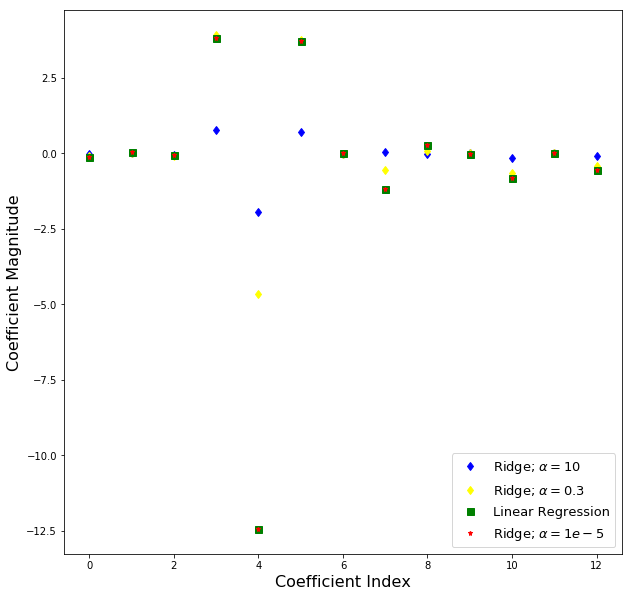

In [7]:
plt.figure(figsize=(10,10))

plt.plot(rr10.coef_,
         linestyle='none',
         marker='d',
         markersize=6,
         color='blue',
         label=r'Ridge; $\alpha = 10$') 
plt.plot(rr.coef_,
         linestyle='none',
         marker='d',
         markersize=6,
         color='yellow',
         label=r'Ridge; $\alpha = 0.3$') 
plt.plot(lr.coef_,
         linestyle='none',
         marker='s',
         markersize=7,
         color='green',
         label='Linear Regression')
plt.plot(rr_small.coef_,
         linestyle='none',
         marker='*',
         markersize=5,
         color='red',
         label=r'Ridge; $\alpha = 1e-5$')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

## Lasso regression

The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as

<img src="lasso_formula.png">

This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

Generate a Lasso model with ```alpha=1e-1``` and ```normalize=True```

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1e-1, normalize=True)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Now check the number of coefficients that are different than 0. To which parameters would you expect they correspond? You may check if you are right by looking at exercise 1 from the previous session.

In [9]:
coeff_used = np.sum(lasso.coef_!=0)
print(f"number of features used: {coeff_used}")

number of features used: 3


In [10]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        3.00832491, -0.        , -0.        , -0.        , -0.        ,
       -0.25443704,  0.        , -0.5140833 ])

In [11]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Repeat again the Lasso regression but changing the alpha parameter to 1e-5. How many coefficients will be different than 0 now? And if you use a big alpha, say 100, what should happen?

In [12]:
lasso_small = Lasso(alpha=1e-5, normalize=True)
lasso_small.fit(X_train,y_train)
coeff_used_small = np.sum(lasso_small.coef_!=0)
print(f"number of features used: for alpha=1e-5: {coeff_used_small}")

number of features used: for alpha=1e-5: 13


In [13]:
lasso_large = Lasso(alpha=100, normalize=True)
lasso_large.fit(X_train,y_train)
coeff_used_large = np.sum(lasso_large.coef_!=0)
print(f"number of features used: for alpha=100: {coeff_used_large}")

number of features used: for alpha=100: 0


Finally train a linear model, plot the coefficients obtained for the different lasso models and compare them with the linear regression.

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

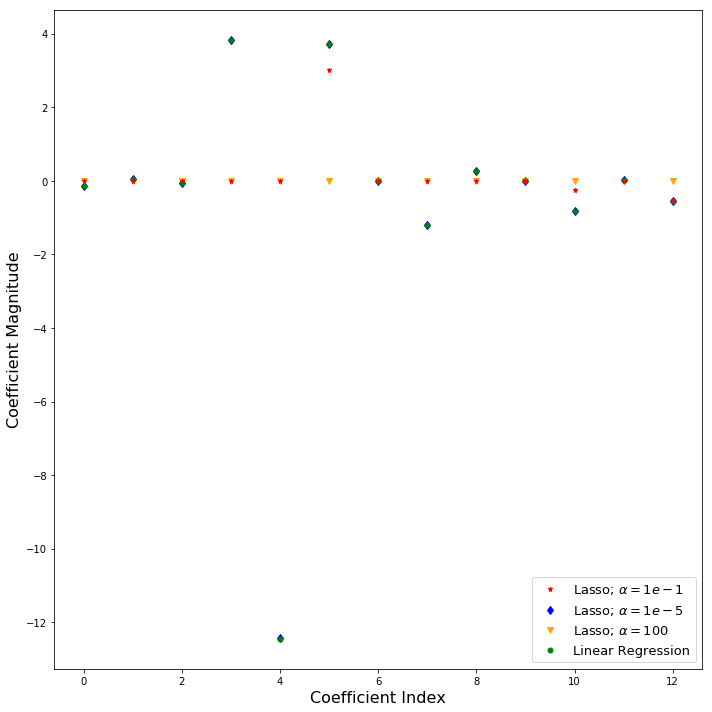

In [15]:
plt.figure(figsize=(10,10))

plt.plot(lasso.coef_,
         linestyle='none',
         marker='*',
         markersize=5,
         color='red',
         label=r'Lasso; $\alpha = 1e-1$',
         zorder=7) # alpha here is for transparency

plt.plot(lasso_small.coef_,
         linestyle='none',
         marker='d',
         markersize=6,
         color='blue',
         label=r'Lasso; $\alpha = 1e-5$')

plt.plot(lasso_large.coef_,
         linestyle='none',
         marker='v',
         markersize=6,
         color='orange',
         label=r'Lasso; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,
         linestyle='none',
         marker='o',
         markersize=5,
         color='green',
         label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. Implement a CV with the ```LassoCV``` object. Print the optimal alpha and the score on the test set. Note that there are similar functions for Ridge regression and Elastic net, which has a regularization that combines both L1 and L2 regularizations. Play with the variable `cv` from the `LassoCV` object to perform k-fold cross-validation. What is the minimum value that you can give to `cv`, and the maximum? 

In [16]:
from sklearn.linear_model import LassoCV

reg = LassoCV(cv=4,normalize=True).fit(X_train, y_train)

In [17]:
reg.alpha_

0.00037251251576780973

In [18]:
reg.score(X_test, y_test)

0.7141147645981752